In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import os
from os import *
import re
import imutils
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import collections
import random

In [2]:
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]


In [ ]:
p = '/home/jovyan/DATA_MASTER_PROJECT/Check_DIFF_T60_T_97/full_size_IMAGES/full_size_CONTROLL/'

t = []
for i in sorted(listdir(p),key=natural_keys ):
    
    im =cv2.imread(p+i)
    if np.count_nonzero(im == 255) < 10000000:
        t.append(im)

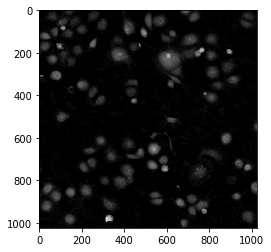

In [41]:
img = cv2.imread('/home/jovyan/tracking_cells_Dataset/Capture#1 September 30 (Well A1) - 21 - Take #3  (97.175; 5.673; 3.288) in A1.tiff')
plt.imshow(img)


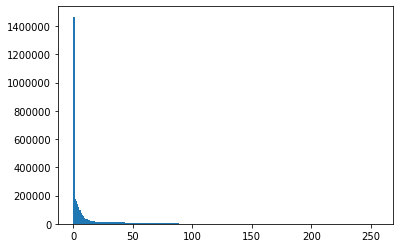

In [42]:
plt.hist(img.ravel(),256,[0,256]) 
plt.show() 

In [43]:
# b,g,r = cv2.split(img)           # get b,g,r
# rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# # Denoising
# dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

# b,g,r = cv2.split(dst)           # get b,g,r
# rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

# plt.imshow(rgb_dst)

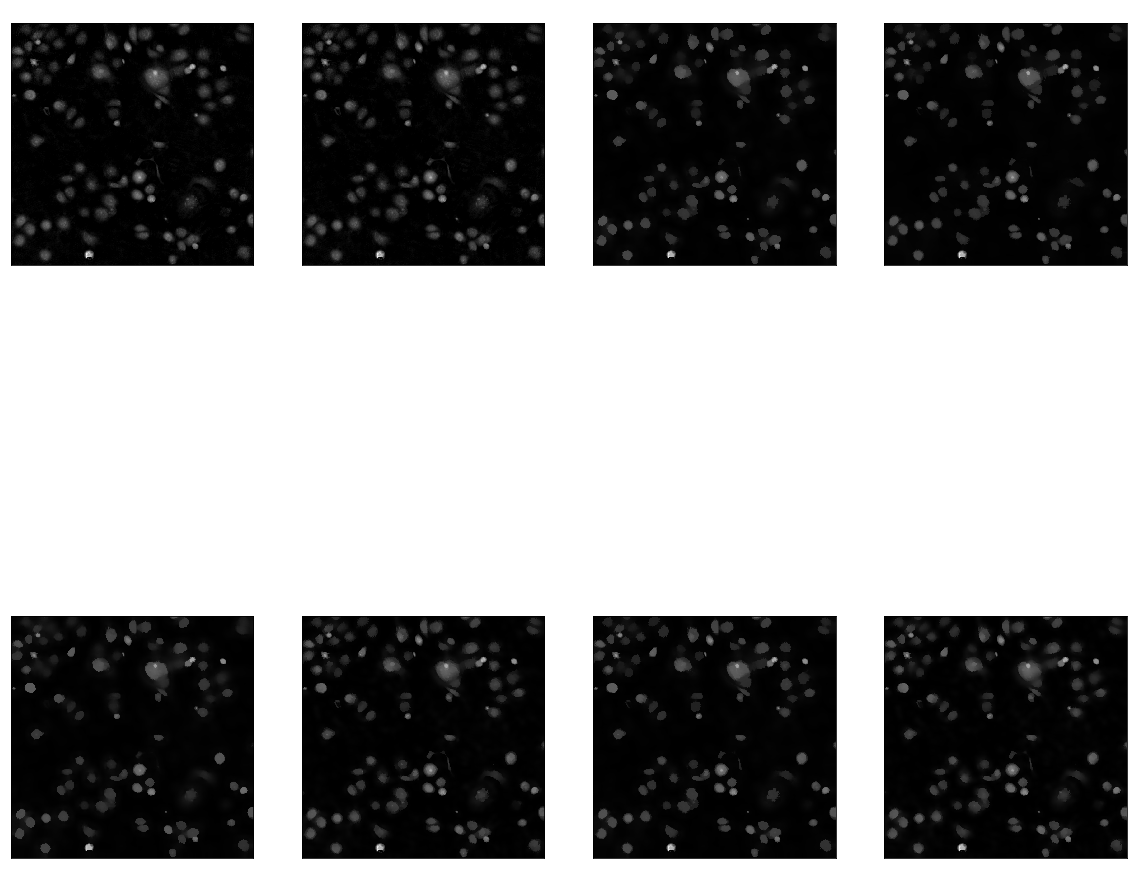

In [44]:
shifted1 = cv2.pyrMeanShiftFiltering(img, 0, 0)
shifted2 = cv2.pyrMeanShiftFiltering(img, 20, 40)
shifted3 = cv2.pyrMeanShiftFiltering(img, 30, 30)
shifted4 = cv2.pyrMeanShiftFiltering(img, 20, 50)
shifted5 = cv2.pyrMeanShiftFiltering(img, 10, 20)
shifted6 = cv2.pyrMeanShiftFiltering(img, 20, 30)
shifted7 = cv2.pyrMeanShiftFiltering(img, 10, 30)




titles = ['Original Image','1','2','3','4','5','6','7']
images = [img, shifted1,shifted2,shifted3,shifted4,shifted5,shifted6,shifted7]

fig = plt.figure(figsize=(20, 20))


for i in range(8):
    ax = fig.add_subplot(2,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], color='white')
    plt.xticks([]),plt.yticks([])
plt.show()

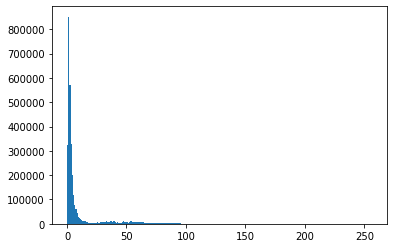

In [45]:
plt.hist(shifted6.ravel(),256,[0,256])

plt.show() 

In [46]:
gray = cv2.cvtColor(shifted6,cv2.COLOR_BGR2GRAY)

In [ ]:
thresh1 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh3 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh4 = cv2.threshold(gray,0,150,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh5 = cv2.threshold(gray,0,200,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
titles = ['Original Image','BINARY','BINARY_INV','B2','B3','B4']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

fig = plt.figure(figsize=(20, 20))

for i in range(6):
    ax = fig.add_subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], color='white')
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
plt.hist(thresh2.ravel(),256,[0,256]) 
plt.show() 

In [ ]:
#ret,th1 = cv2.threshold(gray,50,255,cv2.THRESH_BINARY)

#th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            #cv2.THRESH_BINARY,11,2)

#th3 = cv2.adaptiveThreshold(gray,200,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            #cv2.THRESH_BINARY,11,2)

#titles = ['Original Image', 'Global Thresholding',
           # 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
#images = [gray, th1, th2, th3]

#fig = plt.figure(figsize=(20, 20))

#for i in range(4):
    #ax = fig.add_subplot(2,2,i+1),plt.imshow(images[i],'gray')
    #plt.title(titles[i], color = 'white')
    #plt.xticks([]),plt.yticks([])
#plt.show()

In [ ]:
# # global thresholding
# ret1,th1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
# # Otsu's thresholding
# ret2,th2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # Otsu's thresholding after Gaussian filtering
# blur = cv2.GaussianBlur(gray,(5,5),0)
# ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # plot all the images and their histograms
# images = [img, 0, th1,
#           img, 0, th2,
#           blur, 0, th3]
# titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
#           'Original Noisy Image','Histogram',"Otsu's Thresholding",
#           'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
# fig = plt.figure(figsize=(20, 20))

# for i in range(3):
#     ax = fig.add_subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
#     plt.title(titles[i*3],color = 'white'), plt.xticks([]), plt.yticks([])
#     ax = fig.add_subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
#     plt.title(titles[i*3+1], color = 'white'), plt.xticks([]), plt.yticks([])
#     ax = fig.add_subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
#     plt.title(titles[i*3+2],color = 'white'), plt.xticks([]), plt.yticks([])
# plt.show()

In [ ]:
#gray = cv2.cvtColor(shifted5,cv2.COLOR_BGR2GRAY)

#thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]



In [ ]:
D = ndimage.distance_transform_edt(thresh2)


In [ ]:
localMax = peak_local_max(D, indices=False, min_distance=9, labels=thresh2)
plt.imshow(D)
#plt.savefig('distance.png')
#cv2.imwrite('dis.png',D)

In [ ]:
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]

In [ ]:
labels = watershed(-D, markers, mask=thresh2)

plt.imshow(labels)


In [ ]:

cx = []
cy = []
for label in np.unique(labels):
    if label == 0:
        continue
        
    
    mask = np.zeros(gray.shape, dtype='uint8')
    mask[labels == label] = 255
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    
    
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    
    ((x, y), r) = cv2.minEnclosingCircle(c)
    #rad.append(r)
    cx.append(int(x))
    cy.append(int(y))
    
    #cv2.circle(img, (int(x), int(y)), int(r), (0, 255, 0), 2)
    #cv2.drawContours(img, [c], -1,(0, 255, 0), 2)
    
   
    
#plt.imshow(img)
#plt.savefig('cropped.png')
#cv2.imwrite('/home/jovyan/noise.png',img)

In [ ]:
lis = list(range(0,len(cx)))


In [ ]:

for idx, i in enumerate(lis):
    

    
    cv2.circle(img, (cx[idx], cy[idx]), 3, (0, 255, 255), -1)
    cv2.putText(img, "{0}".format(lis[idx]), (cx[idx] - 20, cy[idx] - 20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
    
plt.imshow(img)

In [ ]:
cv2.imwrite('/home/jovyan/cell_track_3.png',img)